In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("academic_performance_extended.csv")

In [3]:
df.head()

,StudentID,Age,Gender,StudyHoursPerWeek,AttendancePercentage,PreviousGPA,FinalExamScore,ProjectScore,ParticipationScore,HomeworkScore,LogStudyHours
0,1,23,Female,20.82,84.72,7.84,69.15,71.08,86.80,86.12,3.08
1,2,20,Male,15.05,95.76,7.08,75.84,65.78,101.69,88.51,2.78
2,3,21,Male,15.18,97.75,6.55,70.77,91.15,67.26,92.82,2.78
3,4,23,Female,17.31,80.91,NaN,46.29,71.78,80.92,95.14,2.91
4,5,19,Female,15.18,77.08,6.55,58.73,75.04,89.00,82.48,2.78


In [4]:
df.isnull().sum()


StudentID               0
Age                     0
Gender                  0
StudyHoursPerWeek       1
AttendancePercentage    2
PreviousGPA             2
FinalExamScore          1
ProjectScore            2
ParticipationScore      2
HomeworkScore           2
LogStudyHours           4
dtype: int64

In [14]:
df = df.dropna()


In [15]:
print(df.isnull().sum())


StudentID               0
Age                     0
Gender                  0
StudyHoursPerWeek       0
AttendancePercentage    0
PreviousGPA             0
FinalExamScore          0
ProjectScore            0
ParticipationScore      0
HomeworkScore           0
LogStudyHours           0
dtype: int64


In [5]:
df.describe()

,StudentID,Age,StudyHoursPerWeek,AttendancePercentage,PreviousGPA,FinalExamScore,ProjectScore,ParticipationScore,HomeworkScore,LogStudyHours
count,69.000000,69.000000,68.000000,67.000000,67.000000,68.00000,67.000000,67.000000,67.000000,65.000000
mean,35.000000,20.710145,15.780882,81.062836,6.979104,69.30500,76.582985,80.341493,94.445224,2.786769
std,20.062403,2.183504,3.936030,23.100518,1.745394,12.55471,7.925170,5.456731,78.577288,0.257446
min,1.000000,17.000000,5.240000,-93.750000,-4.890000,38.91000,58.840000,67.260000,73.750000,1.830000
25%,18.000000,19.000000,12.935000,79.040000,6.490000,62.47250,71.295000,77.460000,79.820000,2.600000
50%,35.000000,21.000000,15.265000,83.150000,7.080000,69.41000,76.260000,80.000000,84.840000,2.780000
75%,52.000000,23.000000,18.335000,85.280000,7.730000,77.43500,81.910000,83.045000,89.840000,2.960000
max,69.000000,24.000000,25.670000,104.900000,9.140000,95.89000,94.390000,101.690000,726.080000,3.280000


In [14]:
df.loc[df["AttendancePercentage"] > 100, "AttendancePercentage"] = None


In [15]:
df.loc[df["StudyHoursPerWeek"] < 0, "StudyHoursPerWeek"] = None

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[colun] >= lower) & (df[column] <= upper)]


In [16]:
print(df)

    StudentID  Age  Gender  StudyHoursPerWeek  AttendancePercentage  \
0           1   23  Female              20.82                 84.72   
1           2   20    Male              15.05                 95.76   
2           3   21    Male              15.18                 97.75   
3           4   23  Female              17.31                 80.91   
4           5   19  Female              15.18                 77.08   
..        ...  ...     ...                ...                   ...   
64         65   23    Male              10.87                 83.08   
65         66   18    Male              15.18                 82.00   
66         67   20    Male              17.06                 90.69   
67         68   17  Female              15.18                 88.55   
68         69   20  Female              10.89                 82.11   

    PreviousGPA  FinalExamScore  ProjectScore  ParticipationScore  \
0          7.84           69.15         71.08               86.80   
1        

In [20]:
df["LogStudyHours"] = np.log1p(df["StudyHoursPerWeek"])


In [16]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    print("------------------------------------------------")

# Check outliers for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    detect_outliers_iqr(df, col)

Outliers in StudentID:
Empty DataFrame
Columns: [StudentID]
Index: []
------------------------------------------------
Outliers in Age:
Empty DataFrame
Columns: [Age]
Index: []
------------------------------------------------
Outliers in StudyHoursPerWeek:
Empty DataFrame
Columns: [StudyHoursPerWeek]
Index: []
------------------------------------------------
Outliers in AttendancePercentage:
    AttendancePercentage
7                 -93.75
14                101.59
19                 98.35
29                104.90
55                 99.02
------------------------------------------------
Outliers in PreviousGPA:
   PreviousGPA
5        -4.89
------------------------------------------------
Outliers in FinalExamScore:
    FinalExamScore
24           39.35
------------------------------------------------
Outliers in ProjectScore:
Empty DataFrame
Columns: [ProjectScore]
Index: []
------------------------------------------------
Outliers in ParticipationScore:
   ParticipationScore
1       

Outliers in StudentID have been capped to [-173.50, 524.50]
Outliers in Age have been capped to [13.00, 29.00]
Outliers in StudyHoursPerWeek have been capped to [3.11, 26.82]
Outliers in AttendancePercentage have been capped to [67.40, 102.69]
Outliers in PreviousGPA have been capped to [4.60, 9.48]
Outliers in FinalExamScore have been capped to [38.28, 103.45]
Outliers in ProjectScore have been capped to [51.84, 99.01]
Outliers in ParticipationScore have been capped to [67.26, 93.00]
Outliers in HomeworkScore have been capped to [65.76, 104.19]
Outliers in LogStudyHours have been capped to [2.00, 3.50]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

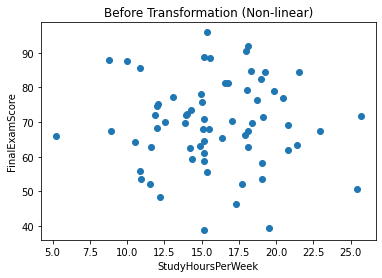

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['StudyHoursPerWeek'], df['FinalExamScore'])
plt.xlabel('StudyHoursPerWeek')
plt.ylabel('FinalExamScore')
plt.title('Before Transformation (Non-linear)')
plt.show()


In [9]:
import numpy as np

df['LogStudyHours'] = np.log1p(df['StudyHoursPerWeek'])


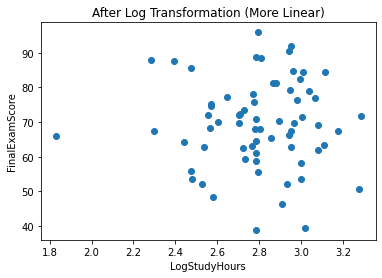

In [10]:
plt.scatter(df['LogStudyHours'], df['FinalExamScore'])
plt.xlabel('LogStudyHours')
plt.ylabel('FinalExamScore')
plt.title('After Log Transformation (More Linear)')
plt.show()

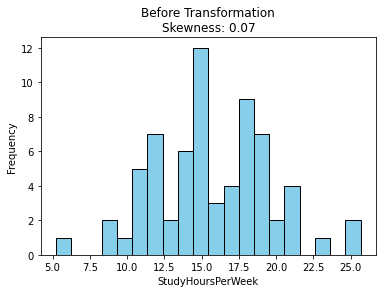

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import skew

# Before Transformation
plt.hist(df['StudyHoursPerWeek'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('StudyHoursPerWeek')
plt.ylabel('Frequency')
plt.title(f'Before Transformation\nSkewness: {skew(df["StudyHoursPerWeek"].dropna()):.2f}')
plt.show()

In [12]:
import numpy as np

df['LogStudyHours'] = np.log1p(df['StudyHoursPerWeek'])

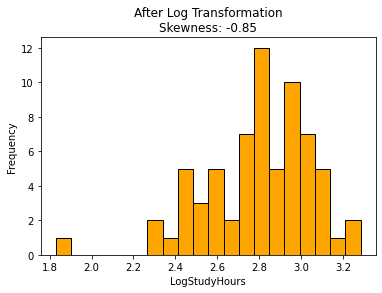

In [13]:
plt.hist(df['LogStudyHours'], bins=20, color='orange', edgecolor='black')
plt.xlabel('LogStudyHours')
plt.ylabel('Frequency')
plt.title(f'After Log Transformation\nSkewness: {skew(df["LogStudyHours"].dropna()):.2f}')
plt.show()


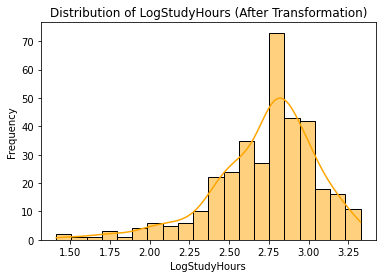

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df["LogStudyHours"], kde=True, bins=20, color="orange")
plt.title("Distribution of LogStudyHours (After Transformation)")
plt.xlabel("LogStudyHours")
plt.ylabel("Frequency")
plt.show()


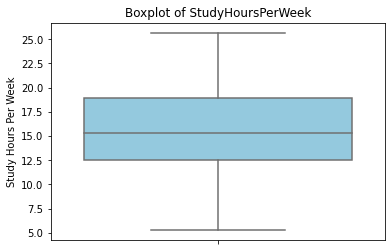

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(y=df['StudyHoursPerWeek'], color='skyblue')
plt.title("Boxplot of StudyHoursPerWeek")
plt.ylabel("Study Hours Per Week")
plt.show()


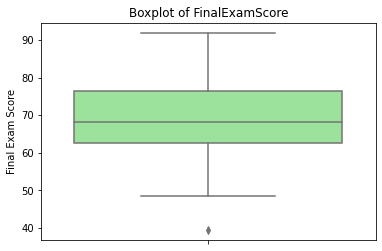

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['FinalExamScore'], color='lightgreen')
plt.title("Boxplot of FinalExamScore")
plt.ylabel("Final Exam Score")
plt.show()


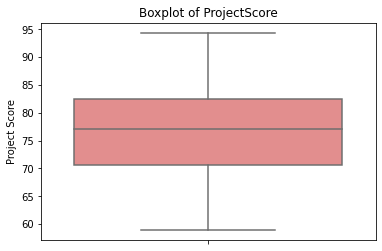

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ProjectScore'], color='lightcoral')
plt.title("Boxplot of ProjectScore")
plt.ylabel("Project Score")
plt.show()


In [20]:
from scipy.stats import zscore

df['StudyHours_Z'] = zscore(df['StudyHoursPerWeek'])
df[['StudyHoursPerWeek','StudyHours_Z']].head()


,StudyHoursPerWeek,StudyHours_Z
0,20.82,1.183357
1,15.05,-0.233802
2,15.18,-0.201873
4,15.18,-0.201873
5,12.00,-0.982907


In [23]:
numeric_cols = ['StudyHoursPerWeek', 'FinalExamScore', 'ProjectScore', 'HomeworkScore']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

